In [1]:
%load_ext autoreload
%autoreload 2

import collections
import cPickle as pickle
import lasagne
import mahotas as mh
import numpy as np
import os
import time

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '5711' (I am process '8677')
Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import sys
sys.path.append('../')
import gp

In [3]:
image, prob, mask, gold, rhoana = gp.Util.read_section('/home/d/data/cylinderNEW/', 100)

Loading z00000100.png


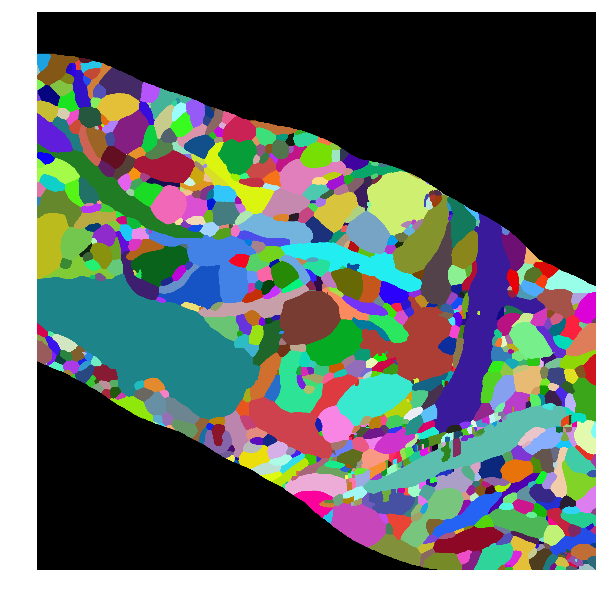

In [4]:
gp.Util.view(rhoana, color=True, large=True)


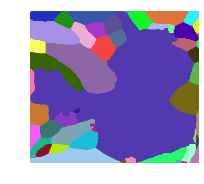

In [5]:
label_value = rhoana[1250,1400]
binary = gp.Util.threshold(rhoana, label_value)
bb = mh.bbox(binary)
gp.Util.view(gp.Util.normalize_labels(gp.Util.crop_by_bbox(rhoana, bb))[0], color=True, large=False, file='/tmp/seg.png')

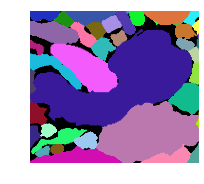

In [6]:
gp.Util.view(gp.Util.normalize_labels(gp.Util.crop_by_bbox(gold, bb))[0], color=True, large=False, file='/tmp/gold.png')


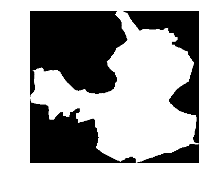

In [7]:
gp.Util.view(binary, color=False, crop=True)

In [16]:
label_value

600

In [16]:
dilated_binary = np.array(gp.Util.crop_by_bbox(binary,bb), dtype=np.bool)
for i in range(20):
  dilated_binary = mh.dilate(dilated_binary)      

In [35]:
bb

array([1045, 1359, 1183, 1530])

In [64]:
bb = [bb[0]-20, bb[1]+20, bb[2]-20, bb[3]+20]
cropped_image = gp.Util.crop_by_bbox(image, bb)
dilated_binary = np.array(gp.Util.crop_by_bbox(binary,bb), dtype=np.bool)
for i in range(20):
  dilated_binary = mh.dilate(dilated_binary)  
speed_image = gp.Legacy.gradient(cropped_image)

In [37]:
ws = gp.Legacy.random_watershed(dilated_binary, speed_image, border_seeds=True, erode=False)

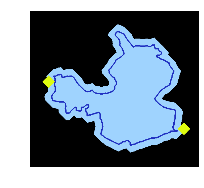

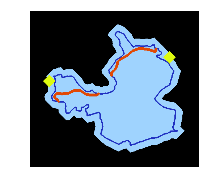

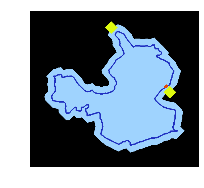

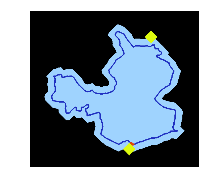

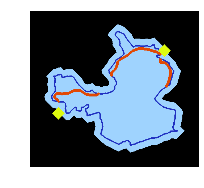

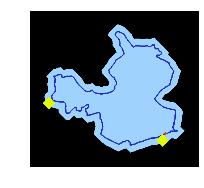

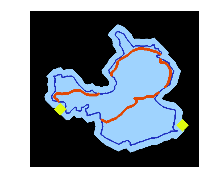

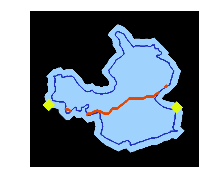

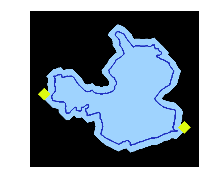

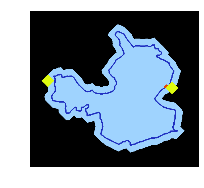

In [227]:
outputs = []

cropped_binary = gp.Util.crop_by_bbox(binary,bb)
for i in range(10):
    seeds, ws = gp.Legacy.random_watershed(dilated_binary, speed_image, border_seeds=True, erode=False)

    output = np.array(dilated_binary).astype(np.uint8)
    
    ws_label1 = ws.max()
    ws_label2 = ws.max()-1
    border = mh.labeled.border(ws, ws_label1, ws_label2)
    border[cropped_binary == 0] = 0
    border = mh.dilate(border)
    border = mh.dilate(border)
    border = mh.dilate(border)

    orig_border = np.array(dilated_binary)
    orig_border[:] = 0
    orig_border[mh.labeled.border(cropped_binary,0,1) == 1] = 1
    orig_border = mh.dilate(orig_border)
    
    seeds = mh.dilate(seeds)
    seeds = mh.dilate(seeds)
    seeds = mh.dilate(seeds)
    seeds = mh.dilate(seeds)
    seeds = mh.dilate(seeds)
    seeds = mh.dilate(seeds)
    seeds = mh.dilate(seeds)
    seeds = mh.dilate(seeds)
    seeds = mh.dilate(seeds)
    
    output[dilated_binary == 1] = 1

    output[orig_border == 1] = 2
    output[border == 1] = 888
    output[seeds != 0] = 11
    
    outputs.append(output)
    gp.Util.view(output, large=False)

In [214]:
really_good_ones = []

In [228]:
really_good_ones.append(outputs[-4].copy())

In [222]:
really_good_ones.append(outputs[3].copy())

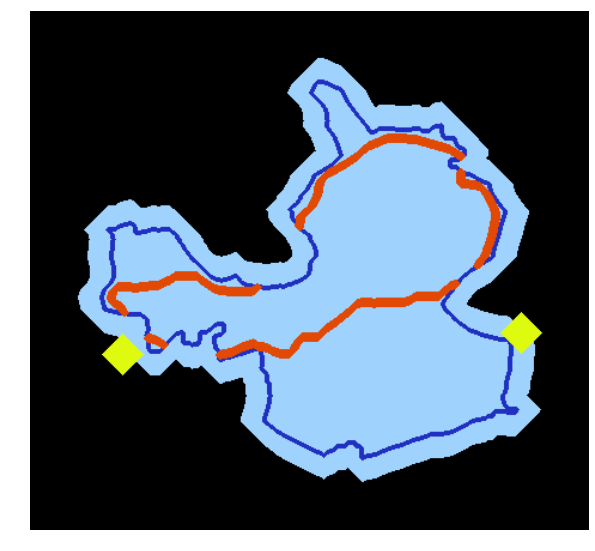

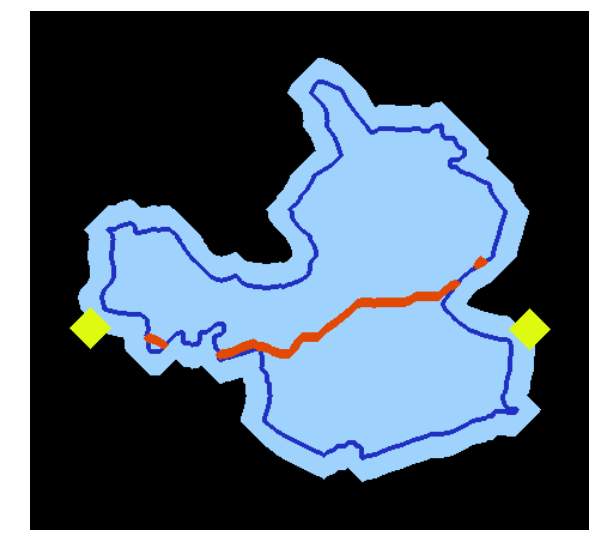

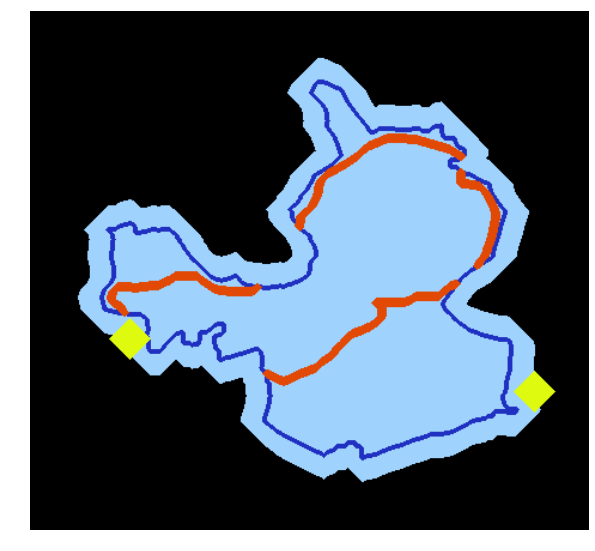

In [230]:
for i in range(len(really_good_ones)):
    gp.Util.view(really_good_ones[i], large=True, file='/tmp/'+str(i)+'.png')
    